<a href="https://colab.research.google.com/github/jerryjerry9/FRI_ML/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pickle



In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
training_data = datasets.FashionMNIST(
    root="data",            # 資料放置路徑
    train=True,             # 訓練資料集
    download=True,          # 自動下載
    transform=ToTensor(),   # 資料轉換函數
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
test_data = datasets.FashionMNIST(
    root="data",            # 資料放置路徑
    train=False,            # 測試資料集
    download=True,          # 自動下載
    transform=ToTensor(),   # 資料轉換函數
)

In [6]:
# 批次載入資料筆數
batch_size = 64

# 建立 DataLoader
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [7]:
size = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
test_size = len(test_dataloader.dataset)
test_num_batches = len(test_dataloader)

In [8]:
print(size,num_batches)
print(test_size,test_num_batches)

60000 938
10000 157


In [9]:
for X, y in train_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [87]:
dataiter = iter(test_dataloader)
data = dataiter.next()
feature, labels = data
print(feature.shape)


AttributeError: ignored

In [11]:
i=17
aaa = feature[i,0,:,:]
print(aaa.shape)
print(labels[i])


torch.Size([28, 28])
tensor(4)


In [12]:
# 各類別名稱
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [120]:
wrong_mask = np.abs(truth-pred_result)
wrong=np.zeros((9))
a=0
for i in range(1500,1570):
  if wrong_mask[i]:
    wrong[a] = i
    a=a+1
    print('wrong',a)
    print('   ',classes[int(truth[i])])
    print('   ',classes[int(pred_result[i])])

wrong 1
    Sandal
    Sneaker
wrong 2
    Shirt
    Pullover
wrong 3
    T-shirt/top
    Dress
wrong 4
    Ankle boot
    Sneaker
wrong 5
    Pullover
    Shirt
wrong 6
    Pullover
    Shirt
wrong 7
    Pullover
    Coat
wrong 8
    Dress
    Trouser
wrong 9
    Sneaker
    Sandal


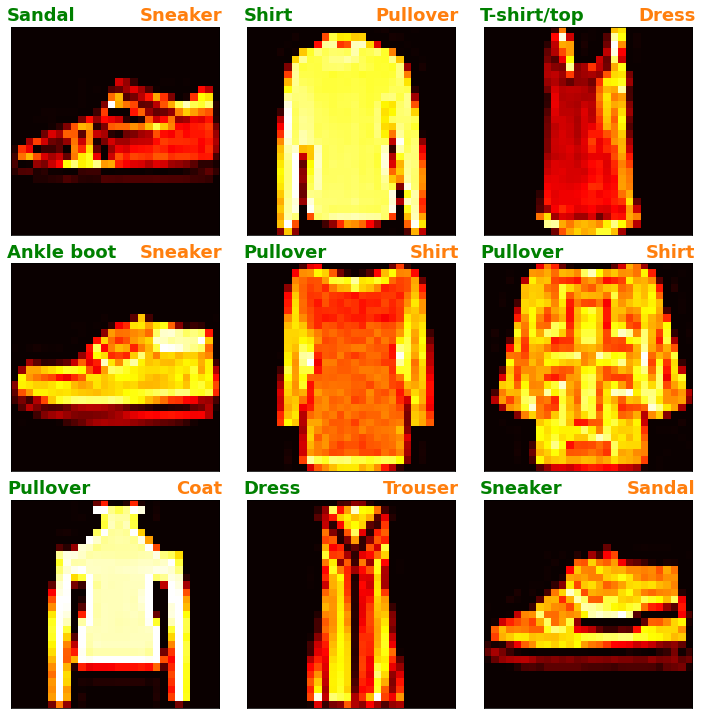

In [156]:

fig, ax = plt.subplots(3,3,figsize=(10,10))
a=0
for i in range(0,3):
  for j in range(0,3):
    xx, yy = test_data[int(wrong[a])][0], test_data[int(wrong[a])][1]
    ax[i,j].imshow(xx[0,:,:],cmap='hot')
    #title =  classes[yy] + ' vs ' + classes[int(pred_result[int(wrong[a])])]
    title1 =  classes[yy]
    title2 =  classes[int(pred_result[int(wrong[a])])]
    ax[i,j].text(-1, -2, title1,color='green', size=18,fontweight='semibold',ha='left',va='center')
    #ax[i,j].text(13, -2, ' vs ',color='k', size=14,fontweight='semibold',ha='center',va='center')
    ax[i,j].text(28, -2, title2,color='tab:orange', size=18,fontweight='semibold',ha='right',va='center')
    #ax[i,j].set_title(classes[yy],fontsize=20)
    #ax[i,j].set_title(title,fontsize=20)
    ax[i,j].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    a=a+1
plt.tight_layout()
plt.savefig('drive/MyDrive/ml_data/hw01/class_demo.png',dpi=400)

In [14]:
# 定義類神經網路模型
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # 建立類神經網路各層
        self.flatten = nn.Flatten()  # 轉為一維向量
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),   # 線性轉換
            nn.ReLU(),               # ReLU 轉換
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        # 定義資料如何通過類神經網路各層
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
# 若 CUDA 環境可用，則使用 GPU 計算，否則使用 CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [16]:
# 建立類神經網路模型，並放置於 GPU 或 CPU 上
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [17]:
# 損失函數
loss_fn = nn.CrossEntropyLoss()

# 學習優化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [18]:
# 訓練模型
def train(dataloader, model, loss_fn, optimizer):
    # 資料總筆數
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    # 將模型設定為訓練模式
    model.train()
    train_loss = 0
    # 批次讀取資料進行訓練
    for batch, (X, y) in enumerate(dataloader):
        # 將資料放置於 GPU 或 CPU
        X, y = X.to(device), y.to(device)

        pred = model(X)         # 計算預測值
        loss = loss_fn(pred, y) # 計算損失值（loss）
        train_loss += loss_fn(pred, y).item()
        optimizer.zero_grad()   # 重設參數梯度（gradient）
        loss.backward()         # 反向傳播（backpropagation）
        optimizer.step()        # 更新參數
    train_loss /= num_batches
    return(train_loss)
        # 輸出訓練過程資訊
        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        

In [22]:
# 測試模型
def test(dataloader, model, loss_fn):
    # 資料總筆數
    size = len(dataloader.dataset)

    # 批次數量
    num_batches = len(dataloader)

    # 將模型設定為驗證模式
    model.eval()

    # 初始化數值
    test_loss, correct = 0, 0

    # 驗證模型準確度
    with torch.no_grad():  # 不要計算參數梯度
        for X, y in dataloader:
            # 將資料放置於 GPU 或 CPU
            X, y = X.to(device), y.to(device)

            # 計算預測值
            pred = model(X)

            # 計算損失值的加總值
            test_loss += loss_fn(pred, y).item()

            # 計算預測正確數量的加總值
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # 計算平均損失值與正確率
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss , correct*100

In [25]:
# 設定 epochs 數
epochs = 100
total_trainloss = np.zeros((epochs)) 
total_testloss = np.zeros((epochs)) 
total_acc = np.zeros((epochs)) 
# 開始訓練模型
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainloss = train(train_dataloader, model, loss_fn, optimizer)
    testloss,acc = test(test_dataloader, model, loss_fn)
    total_trainloss[t] = trainloss
    total_testloss[t] = testloss
    total_acc[t] = acc
print('done')

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 63.6%, Avg loss: 1.253825 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 64.8%, Avg loss: 1.086399 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.979195 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 66.9%, Avg loss: 0.906898 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 68.0%, Avg loss: 0.855410 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 69.3%, Avg loss: 0.816638 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.785856 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 71.6%, Avg loss: 0.760265 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 72.7%, Avg loss: 0.738163 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 73.8%, Avg loss: 0.718494 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 74.7%, Avg los

In [27]:
# 儲存模型參數
torch.save(model.state_dict(), "drive/MyDrive/ml_data/hw01/model_0919_100epoch.pth")

with open('drive/MyDrive/ml_data/hw01/total_train_loss.pkl', 'wb') as f:
     pickle.dump(total_trainloss, f)
with open('drive/MyDrive/ml_data/hw01/total_test_loss.pkl', 'wb') as f:
     pickle.dump(total_testloss, f)
with open('drive/MyDrive/ml_data/hw01/total_acc.pkl', 'wb') as f:
     pickle.dump(total_acc, f)

In [28]:
# 建立類神經網路模型
model2 = NeuralNetwork()

# 載入模型參數
model2.load_state_dict(torch.load("drive/MyDrive/ml_data/hw01/model_0919_100epoch.pth"))

<All keys matched successfully>

In [29]:
print(total_trainloss[0:10])
print(total_testloss[0:10])
print(total_acc[0:10])

[1.37259849 1.15619043 1.01987153 0.93020631 0.86802238 0.8224694
 0.7872436  0.75863693 0.73440563 0.71315511]
[1.2538251  1.08639897 0.9791952  0.906898   0.85541003 0.81663767
 0.78585626 0.7602652  0.73816335 0.71849359]
[63.65 64.79 65.77 66.88 68.01 69.27 70.4  71.6  72.68 73.79]


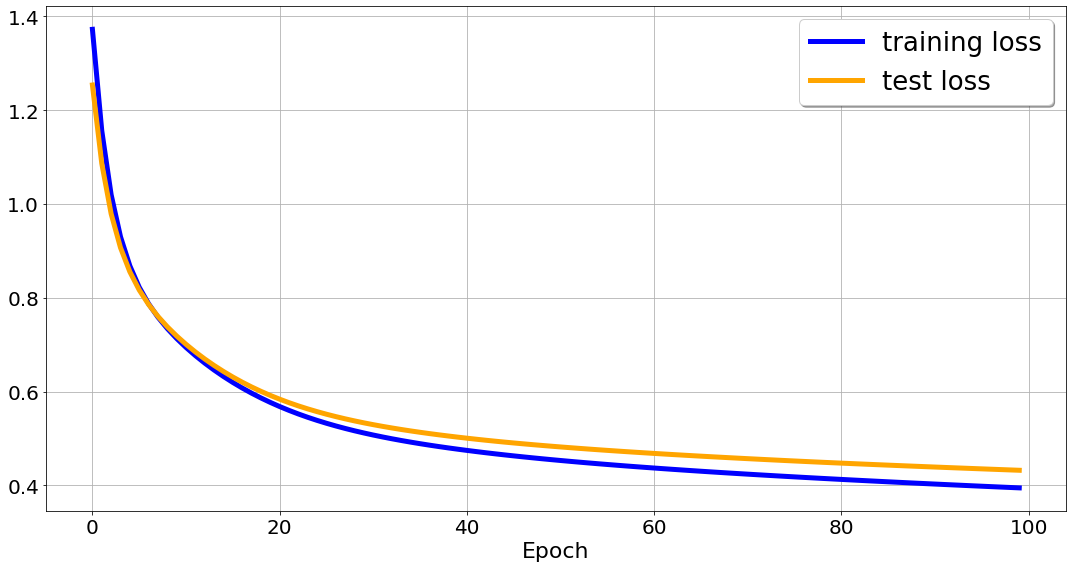

In [33]:

f= plt.figure(figsize=(15,8))
plt.plot(total_trainloss,linewidth=5,c='blue')
plt.plot(total_testloss,linewidth=5,c='orange')
plt.legend(["training loss","test loss"],fontsize=26,shadow=True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Epoch',color='k',fontsize=22)
plt.grid()
plt.tight_layout()
plt.savefig('drive/MyDrive/ml_data/hw01/loss_0919.png',dpi=400)

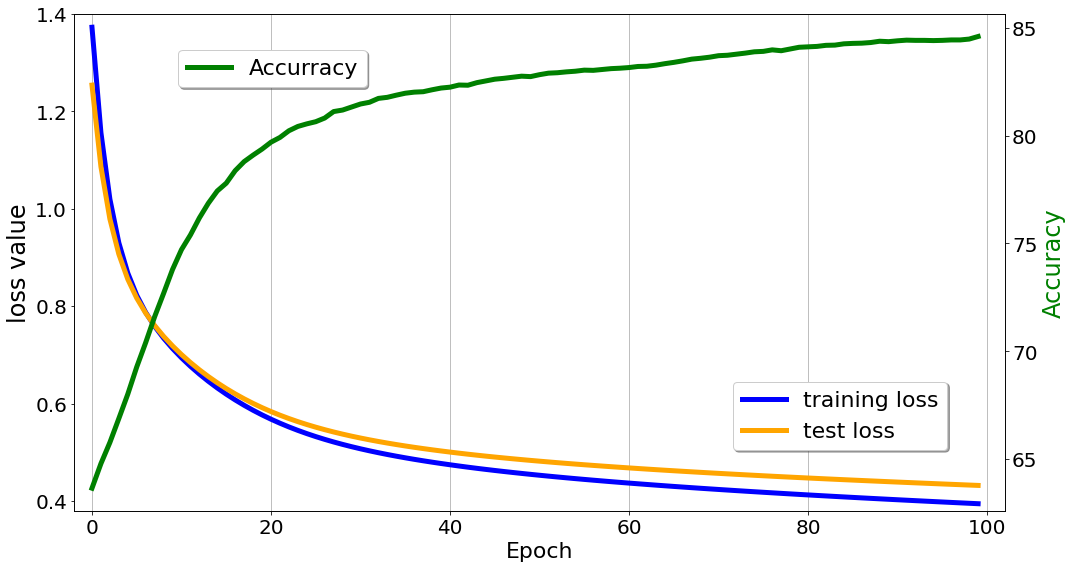

In [68]:
f,ax1= plt.subplots(figsize=(15,8))

ax1.plot(total_trainloss,linewidth=5,c='blue')
ax1.plot(total_testloss,linewidth=5,c='orange')
plt.legend(["training loss","test loss",],fontsize=22,shadow=True,loc=4,bbox_to_anchor=(0.95,0.1))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('loss value',fontsize=24)
ax1.set_xlabel('Epoch',color='k',fontsize=22)
ax1.grid(axis='x')
plt.axis([-2,102,0.38,1.4])


ax2 = ax1.twinx()
ax2.plot(total_acc,linewidth=5,c='green')
plt.ylabel('Accuracy',fontsize=24,c='green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(["Accurracy"],fontsize=22,shadow=True,loc=2,bbox_to_anchor=(0.1,0.95))
plt.tight_layout()
plt.savefig('drive/MyDrive/ml_data/hw01/loss_acc_0919.png',dpi=400)

In [69]:
# 各類別名稱
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [ ]:
# 將模型設定為驗證模式
model2.eval()
for x,y in test_data:
# 取得測試資料
  #print(x)
  pred = model2(x)
  #cm[pred[0].argmax(0),y]=cm[pred[0].argmax(0),y]+1

    # 整理測試結果
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'預測值："{predicted}" / 實際值："{actual}"')

In [70]:
model2.eval()
pred_result = np.zeros((10000))
truth = np.zeros((10000))
for i in range(0,10000):
# 取得測試資料
  #print(x)
  x, y = test_data[i][0], test_data[i][1]
  pred = model2(x)
  #cm[pred[0].argmax(0),y]=cm[pred[0].argmax(0),y]+1
  pred_result[i] = pred[0].argmax(0)
  truth[i] = y
    # 整理測試結果
  #predicted, actual = classes[pred[0]).argmax(0)], classes[y]
  #print(f'預測值："{predicted}" / 實際值："{actual}"')

In [74]:
with open('drive/MyDrive/ml_data/hw01/test_data_prediction.pkl', 'wb') as f:
     pickle.dump(pred_result, f)
with open('drive/MyDrive/ml_data/hw01/test_data_truth.pkl', 'wb') as f:
     pickle.dump(truth, f)

In [76]:
hist_pred = np.histogram2d(pred_result,truth)

In [77]:
nparray_h = hist_pred[0]
print(nparray_h.shape)

(10, 10)


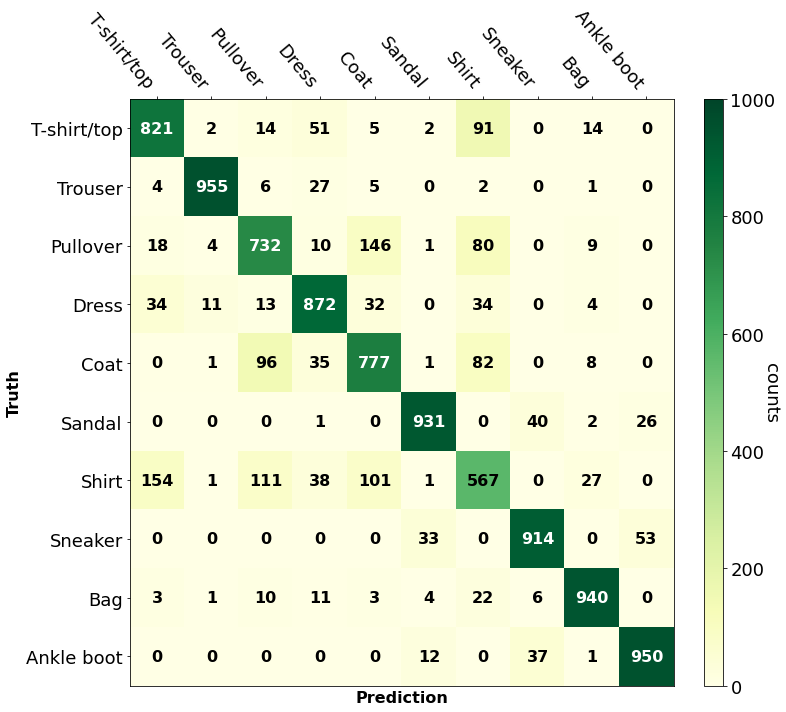

In [78]:
f,ax= plt.subplots(figsize=(11,10))
#ax.hist2d(pred_result, truth,bins=10,cmap='YlGn')
hitplot = ax.pcolormesh(nparray_h,cmap='YlGn',vmax=1000)
for xx in range(0,10):
  for yy in range(0,10):
    if nparray_h[xx,yy] > 600:
      ax.text(xx+0.5, yy+0.5, int(nparray_h[xx,yy]),color='w', size=16,fontweight='semibold',ha='center',va='center')
    else:
      ax.text(xx+0.5, yy+0.5, int(nparray_h[xx,yy]),color='k', size=16,fontweight='semibold',ha='center',va='center')
ax.invert_yaxis()
plt.ylabel('Truth',fontsize=16,fontweight='semibold',rotation=90)
plt.xlabel('Prediction',fontsize=16,fontweight='semibold')
plt.xticks(np.arange(0.5,10,1),classes,fontsize=18,rotation=310,horizontalalignment='right')
ax.xaxis.tick_top()
plt.yticks(np.arange(0.5,10,1),classes,fontsize=18)
cb = plt.colorbar(hitplot,aspect=30,fraction=0.05, pad=0.05)
cb.ax.tick_params(labelsize=18)
cb.set_label('counts', size=18,rotation=270)
plt.tight_layout()
plt.savefig('drive/MyDrive/ml_data/hw01/heatmap_pcolor.png',dpi=400)

In [79]:
#fig, ax = plt.subplots(figsize=(4,3),dpi=250)
#ax = sn.heatmap(cm,xticklabels=classes,yticklabels=classes,annot=True,fmt = 'g',cmap='YlGn',annot_kws={'fontsize':5},cbar=True)
#ax.yaxis.tick_left()
#plt.yticks(rotation=0,fontsize=5)

#ax.xaxis.tick_top()
#plt.xticks(ha='left',rotation=45,fontsize=5)
#plt.ylabel('Truth',color='k',fontsize=6)
#plt.xlabel('Prediction',color='k',fontsize=6)
#plt.tight_layout()
#plt.savefig('drive/MyDrive/ml_data/hw01/heatmap.png',dpi=400)